<a href="https://colab.research.google.com/github/ErfanAsadi/Image-Proccessing/blob/main/haar_wavelet_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Haar Wavelet Transform in python




In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pywt
import math

### Reading lana image and convert it to gray scale

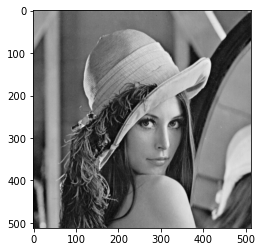

In [ ]:
img = cv.imread('lena.bmp')
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

In [ ]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

Making new arrays to save the transformed image on

In [ ]:
shape = gray_image.shape
first_level_transformed_image = np.zeros(shape)
second_level_transformed_image = np.zeros(shape)

## Haar Wavelet transform from scratch 

## 1D Haar wavelet on Lena
As you know, haar wavelet transform is a seprable transform, this means you can write it as: AXA<sup>T</sup>


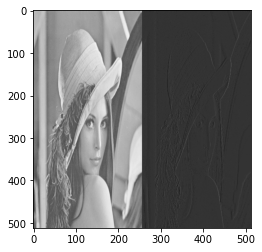

In [ ]:
# First level of transform
for i in range(shape[0]): 
    for j in range(int(shape[1]/2)):
        avg = (int(gray_image[i][2 * j]) + int(gray_image[i][(2 * j) + 1])) / 2
        dis = (int(gray_image[i][2 * j]) - int(gray_image[i][(2 * j) + 1])) / 2
        first_level_transformed_image[i][j] = int(avg)
        first_level_transformed_image[i][j + int(shape[0] / 2)] = int(dis)
        
plt.imshow(first_level_transformed_image, cmap="gray")

## 2D Haar Wavelet on lena

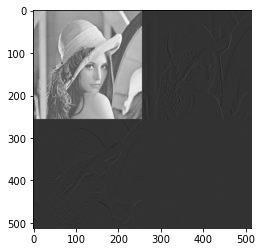

In [ ]:
# Second level of transform
for j in range(shape[1]):
    for i in range(int(shape[0] / 2)):
        avg = (int(transformed_image[2 * i][j]) + int(transformed_image[(2 * i) + 1][j])) / 2
        dis = (int(transformed_image[2 * i][j]) - int(transformed_image[(2 * i) + 1][j])) / 2
        second_level_transformed_image[i][j] = int(avg)
        second_level_transformed_image[i + int(shape[0] / 2)][j] = int(dis)
plt.imshow(second_level_transformed_image, cmap="gray")

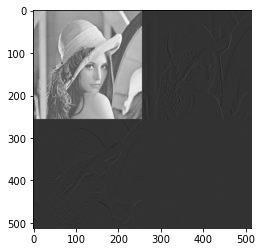

In [ ]:
def one_dimensional_haar_wavelet (image):
    transformed_image = np.zeros(image.shape) 
    for i in range(shape[0]): 
        for j in range(int(shape[1]/2)):
            avg = (int(image[i][2 * j]) + int(image[i][(2 * j) + 1])) / 2
            dis = (int(image[i][2 * j]) - int(image[i][(2 * j) + 1])) / 2
            transformed_image[i][j] = int(avg)
            transformed_image[i][j + int(shape[0] / 2)] = int(dis)
    return transformed_image

def haar_wavelet(image): 
    first_level_transformed_image = one_dimensional_haar_wavelet(image)
    second_level_transformed_image = one_dimensional_haar_wavelet(first_level_transformed_image.transpose()).transpose()
    return second_level_transformed_image;
           
transformed_lena = haar_wavelet(gray_image)
plt.imshow(transformed_lena, cmap="gray")

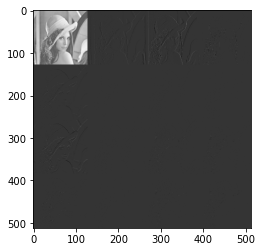

In [ ]:
two_times_transformed_lena = haar_wavelet(transformed_lena)
plt.imshow(two_times_transformed_lena, cmap="gray")

## Reconstructing lena
In this part we are going to reconstruct lena picture by removing different channels of transformed image and see what will happen to each image.

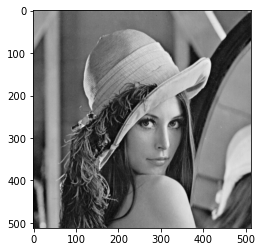

In [ ]:
coeffs = pywt.dwt2(gray_image, 'haar')
reconstructed = pywt.idwt2(coeffs, 'haar')
plt.imshow(reconstructed, cmap="gray")

In [ ]:
LL, (HL, LH, HH) = coeffs
zero = np.zeros(HL.shape)

### Removing HL channel

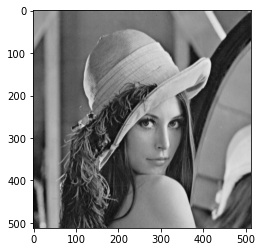

In [ ]:
without_HL = LL, (zero, LH, HH)
reconstructed_without_HL = pywt.idwt2(without_HL, 'haar')
plt.imshow(reconstructed_without_HL, cmap="gray")

In [ ]:
without_HL_psnr=psnr(gray_image, reconstructed_without_HL)
print('PSNR image without HL is: ', without_HL_psnr)

PSNR image without HL is:  36.9276760189779


### Removing LH channel

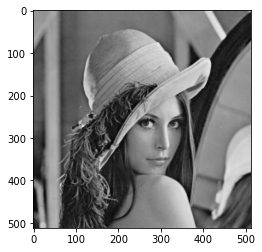

In [ ]:
without_LH = LL, (HL, zero, HH)
reconstructed_without_LH = pywt.idwt2(without_LH, 'haar')
plt.imshow(reconstructed_without_LH, cmap="gray")

In [ ]:
without_LH_psnr=psnr(gray_image, reconstructed_without_LH)
print('PSNR image without LH is: ', without_LH_psnr)

PSNR image without LH is:  33.62871162100325


### Removing HH channel

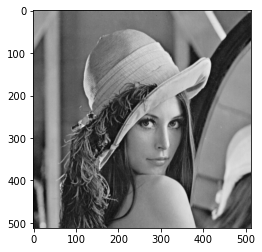

In [ ]:
without_HH = LL, (HL, LH, zero)
reconstructed_without_HH = pywt.idwt2(without_HH, 'haar')
plt.imshow(reconstructed_without_HH, cmap="gray")

In [ ]:
without_HH_psnr=psnr(gray_image, reconstructed_without_HH)
print('PSNR image without HH is: ', without_HH_psnr)

PSNR image without HH is:  42.076654929725485


## Replacing each channel with a logo 

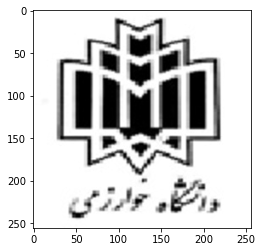

In [ ]:
icon = cv.imread('icon.jpg')
gray_icon = cv.cvtColor(icon, cv.COLOR_BGR2GRAY)
plt.imshow(gray_icon, cmap="gray")

### Replace HL Channel

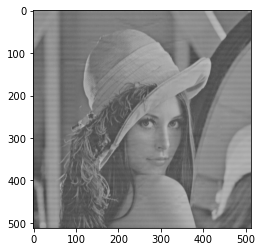

In [ ]:
without_HL_icon = LL, (gray_icon, LH, HH)
reconstructed_without_HL_icon = pywt.idwt2(without_HL_icon, 'haar')
plt.imshow(reconstructed_without_HL_icon, cmap="gray")

In [ ]:
without_HL_psnr_icon = psnr(gray_image, reconstructed_without_HL)
print('PSNR image without HL is: ', without_HL_psnr)

PSNR image without HL is:  36.9276760189779


### Replace LH Channel

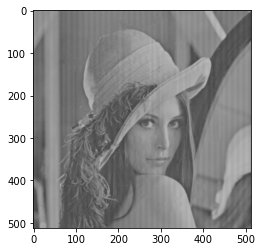

In [ ]:
without_LH_icon = LL, (HL, gray_icon, HH)
reconstructed_without_LH_icon = pywt.idwt2(without_LH_icon, 'haar')
plt.imshow(reconstructed_without_LH_icon, cmap="gray")

In [ ]:
without_LH_psnr_icon=psnr(gray_image, reconstructed_without_LH_icon)
print('PSNR image without LH is: ', without_LH_psnr_icon)

PSNR image without LH is:  7.291209730453414


### Replace HH Channel

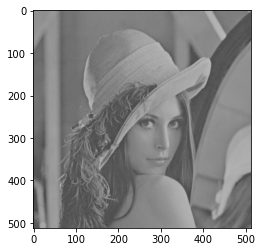

In [ ]:
without_HH_icon = LL, (HL, LH, gray_icon)
reconstructed_without_HH_icon = pywt.idwt2(without_HH_icon, 'haar')
plt.imshow(reconstructed_without_HH_icon, cmap="gray")

In [ ]:
without_HH_psnr_icon=psnr(gray_image, reconstructed_without_HH_icon)
print('PSNR image without HH is: ', without_HH_psnr_icon)

PSNR image without HH is:  7.306784264739271
